# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting accuracy along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?

In [ ]:
!pip3 install tensorflow keras

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD  #Stochastic Gradient Descent

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

In [3]:
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

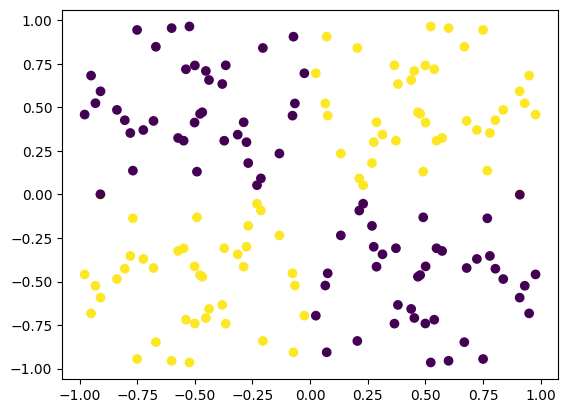

In [4]:
plt.scatter(*zip(*X), c=y)

### Test for Optimal Configuration

Only running 100 epochs due to computer memory issues.

In [5]:
num_layers = [1,2,3,4,5]
neurons = [2, 3, 4]
sgd = SGD(learning_rate=0.1)

def XOR(num_layers, neurons, epochs=100):
    model = Sequential()
    model.add(Dense(neurons, input_dim=2, activation='tanh'))
    for _ in range(num_layers -1):
        model.add(Dense(neurons, activation = 'tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    model.fit(X, y, batch_size = 10, epochs=100)
    scores = model.evaluate(X, y)
    return scores[1]

res = {}

for n in neurons:
    scores = []
    for num_layer in num_layers:
        score = XOR(num_layer, n)
        scores.append(score)
    res[n] = scores

Epoch 1/100


C:\Users\rober\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5028 - loss: 0.6992  
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.5691 - loss: 0.6895
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.6057 - loss: 0.6862
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.4962 - loss: 0.7098
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.6287 - loss: 0.6893
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.6542 - loss: 0.6826
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.6905 - loss: 0.6786
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.6359 - loss: 0.6843
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.6288 - loss: 0.6894
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.6388 - loss: 0.6883
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.6621 - loss: 0.6853
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step

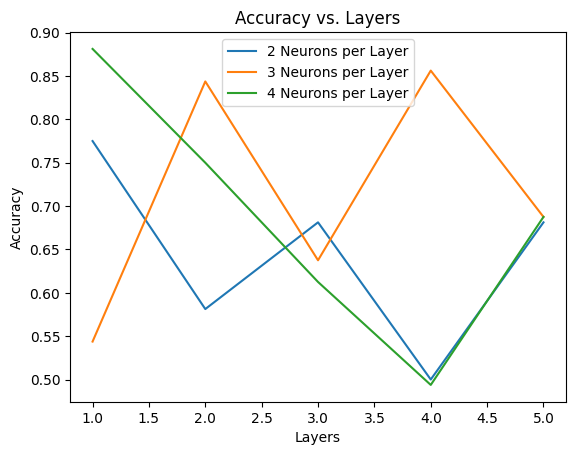

In [6]:
for n in neurons:
    plt.plot(num_layers, res[n], label=f'{n} Neurons per Layer')

plt.xlabel('Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Layers')
plt.legend()
plt.show()

#### Assessment of Optimal Configuration
The three neuron configuration performs poorly with only a single layer, while the two neuron layer performs adequately while the 4 neuron layer performs at its maximum accuracy. In the second layer, both the 4 and 2 neuron configurations decrease in accuracy, while the 3 neuron config increases to near its maximum. None of the configurations perform well with three layers. In the fourth layer, the 2 and 4 neuron configs performally poorly, while the 3 neuron layer is at its maximum accuracy. Finally, in the fifth layer, all configs perform approximately the same, and roughly average accuracy. 

The accuracy for all configurations is not great, likely due to only executing 100 epochs with batch size 10 (due to computer limitations). In any case, we see that 4 layers with 3 neurons each has the highest accuracy. This is only slightly greater than the 2nd layer, also with 3 neuron configuration. Either configuration could be seen as the optimum in this scenario. Strictly using accuracy, 3 neurons in each of 4 layers is optimum. However, it would be substantially faster to run the 2 layer, 3 neuron configuration than running that model over 4 layers. Thus, trading a slight amount of accuracy for a great increase in computer performance/speed may be worthwhile. 

### 3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)

Running 2 layers with 3 neurons, 100 epochs for computer performance considerations.

In [7]:
from keras.layers import Activation
act_fun = ['tanh', 'sigmoid', 'softplus', 'relu', 'softmax', 'selu', 'linear']
#computer can't handle 400 epochs, using 100
def mod_act(activation, epochs=100):
    model=Sequential()
    #add 2 layers
    #layer 1
    model.add(Dense(3, input_dim = 2))
    model.add(Activation(activation))
    #layer 2
    model.add(Dense(3))
    model.add(Activation(activation))
    #output
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    model.fit(X, y, batch_size=10, epochs=100)
    loss, accuracy = model.evaluate(X, y)
    return loss, accuracy

act_res = {}

for activation in act_fun:
    loss, accuracy = mod_act(activation)
    act_res[activation] = {'loss': loss, 'accuracy': accuracy}

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5233 - loss: 0.7027  
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.4689 - loss: 0.7136
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.4877 - loss: 0.7059
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.5299 - loss: 0.6962
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.5012 - loss: 0.7015
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.4831 - loss: 0.7106
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.5287 - loss: 0.6942
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.5007 - loss: 0.6998
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.5396 - loss: 0.6891
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.4776 - loss: 0.7095
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.5102 - loss: 0.6988
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0

In [8]:
print("{:<10} {:<10} {:<10}".format('Activation', 'Loss', 'Accuracy'))
print("----------------------------------")
for activation, result in act_res.items():
    print("{:<10} {:<10.4f} {:<10.4f}".format(activation, result['loss'], result['accuracy']))

Activation Loss       Accuracy  
----------------------------------
tanh       0.6680     0.6438    
sigmoid    0.6931     0.5000    
softplus   0.6913     0.6250    
relu       0.5424     0.6875    
softmax    0.6924     0.5750    
selu       0.3611     0.9062    
linear     0.6935     0.5063    


#### Assessment of Activation Functions

Using the table above, we can see that the 'selu' function has the lowest loss, and also has the highest accuracy given the configuration and modeling (2 layers with 3 neurons each, 100 epochs/batch 10). 

### 4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

In [10]:
opt_fun = ['SGD', 'RMSprop', 'Adam', 'Lion']
def mod_opt(optimizer, epochs=100):
    model=Sequential()
    #add 2 layers
    #layer 1
    model.add(Dense(3, input_dim = 2, activation='selu'))
    #layer 2
    model.add(Dense(3, activation='selu'))
    #output
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.fit(X, y, batch_size=10, epochs=100)
    loss, accuracy = model.evaluate(X, y)
    return loss, accuracy

opt_res = {}

for optimizer in opt_fun:
    loss, accuracy = mod_opt(optimizer)
    opt_res[optimizer] = {'loss': loss, 'accuracy': accuracy}

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.5834 - loss: 0.7448
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.4945 - loss: 0.7764
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.5489 - loss: 0.7575
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.5497 - loss: 0.7169
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.5768 - loss: 0.7282
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.6036 - loss: 0.7140
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.6245 - loss: 0.6917
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.6107 - loss: 0.7110
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.4961 - loss: 0.7535
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.6297 - loss: 0.7078
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.5906 - loss: 0.7132
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0

In [11]:
print("{:<10} {:<10} {:<10}".format('Optimizer', 'Loss', 'Accuracy'))
print("----------------------------------")
for optimizer, result in opt_res.items():
    print("{:<10} {:<10.4f} {:<10.4f}".format(optimizer, result['loss'], result['accuracy']))

Optimizer  Loss       Accuracy  
----------------------------------
SGD        0.6474     0.6750    
RMSprop    0.4861     0.8250    
Adam       0.6605     0.6750    
Lion       0.3013     0.8750    


## Assessment of Optimal Optimizer

Looking at the table above we see the lowest loss and highest accuracy with the Lion optimizer method, given this configuration (2 layers, 3 neurons each, 100 epoch, batch size 10). 

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [58]:
import pandas as pd
from keras.utils import to_categorical
wine = pd.read_csv('../data/wine.data', names = ['class', 'alcohol', 'malic acid', 'ash', 'aclalinity of ash', 'magnesium', 'total phenols',
                                                 'flavanoids', 'nonflavanoids phenols', 'proanthocyanins', 'color intensity', 'hue', 
                                                 'od280/od315 of diluted wines', 'proline'])
wine.dropna(inplace=True)
X = wine.drop(columns=['class'])
y = wine['class'].copy()
y = to_categorical(y -1)

def byod2(layers, neurons, act, opt):
    model = Sequential()
    model.add(Dense(neurons, input_dim= 13, activation=act))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=act))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    record = model.fit(X, y, epochs=100, batch_size=10, validation_split=0.4, verbose=0)
    loss, accuracy = model.evaluate(X, y, verbose=0)
    return loss, accuracy, record.history

In [41]:
configs = [
    {'layers': 2, 'neurons': 3, 'act': 'tanh', 'opt': 'Lion'},
    {'layers': 5, 'neurons': 3, 'act': 'tanh', 'opt': 'Lion'},
    {'layers': 1, 'neurons': 4, 'act': 'tanh', 'opt': 'Lion'},
    {'layers': 2, 'neurons': 3, 'act': 'selu', 'opt': 'Lion'},
    {'layers': 5, 'neurons': 3, 'act': 'selu', 'opt': 'Lion'},
    {'layers': 1, 'neurons': 4, 'act': 'selu', 'opt': 'Lion'},
    {'layers': 2, 'neurons': 3, 'act': 'tanh', 'opt': 'Adam'},
    {'layers': 5, 'neurons': 3, 'act': 'tanh', 'opt': 'Adam'},
    {'layers': 1, 'neurons': 4, 'act': 'tanh', 'opt': 'Adam'},
    {'layers': 2, 'neurons': 3, 'act': 'selu', 'opt': 'Adam'},
    {'layers': 5, 'neurons': 2, 'act': 'selu', 'opt': 'Adam'},
    {'layers': 1, 'neurons': 4, 'act': 'selu', 'opt': 'Adam'}
]

In [59]:
results2 = []

for config in configs:
    layers = config['layers']
    neurons = config['neurons']
    act = config['act']
    opt = config['opt']
    loss, accuracy, record = byod2(layers, neurons, act,  opt)
    results2.append({'layers': layers, 'neurons': neurons, 'activation': act, 
                    'optimizater':opt, 'loss':loss, 'accuracy':accuracy, 'record': record}) 

C:\Users\rober\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\rober\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\rober\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in

In [60]:
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format('Layers', 'Neurons', 'Activation', 'Optimizer', 'Loss', 'Accuracy'))
print("------------------------------------------------------------------------------------------------")
for result in results2:
    print("{:<10} {:<10} {:<10} {:<10} {:<10.4f} {:<10.4f}".format(result['layers'], result['neurons'], 
                                                                   result['activation'], result['optimizater'], 
                                                                   result['loss'], result['accuracy']))

Layers     Neurons    Activation Optimizer  Loss       Accuracy  
------------------------------------------------------------------------------------------------
2          3          tanh       Lion       1.5913     0.6348    
5          3          tanh       Lion       2.6137     0.3315    
1          4          tanh       Lion       2.7057     0.3315    
2          3          selu       Lion       3.3941     0.3315    
5          3          selu       Lion       3.8605     0.3315    
1          4          selu       Lion       5.8608     0.6798    
2          3          tanh       Adam       1.6706     0.3315    
5          3          tanh       Adam       1.6418     0.3315    
1          4          tanh       Adam       1.3295     0.6011    
2          3          selu       Adam       1.8456     0.3315    
5          2          selu       Adam       2.0812     0.3315    
1          4          selu       Adam       6.2342     0.6629    


#### Discussion

One major limitation is that I used the optimal configurations from the XOR dataset for the configurations in this dataset. However, the correct configuration would certainly be different for a wholly different dataset. A more robust function could be defined to evaluate layers and neurons, assuming network architecture existed to support the increase in computational power. For the sake of runtime and demonstration, I elected to use the known configurations from part one as part of the configurations for part 2. 

Similarly, I elected to only test the 'tanh' and 'selu' activation methods, as well as the 'Lion' and 'Adam' optimizers, again using part 1 as a reference. The same discussion as above applies.

As we see, due to these limitations, as well as the batch size and epoch limit, none of these models is very accurate. The lowest loss is well over 1 (1.32, in the 1 layer, 4 neuron, tanh activation, Adam optimizer configuration). The highest accuracy is below 68% (67.98%, 1 layer 4 neuron, selu activation, lion optimizer). Given the models/configurations tested, I would elect to use the 2 layer, 3 neuron, tanh activation, lion optimizer configuration. It is the best combination of 'low' loss (1.59) and 'high' accuracy (63.5%). A close second would be the 1 layer, 4 neuron, tanh activation, Adam optimizer configuration, which has a lower loss figure (1.32), but also a lower accuracy (60.1%). Again, we could weigh the cost/benefit of multiple neurons across many layers and the effect on computational speed/power when determining the best model to go forward with. First, though, a more robust evaluation should be done (since none of these figures gives much confidence in the model).

##### Citations:

Data: https://archive.ics.uci.edu/dataset/109/wine

ChatGPT: Code help (tables, formatting of functions, categorical crossentropy modifications). 